In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Choose a classifier and train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred, target_names=iris.target_names))
# Calculate accuracy for Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred)
print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy*100))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Accuracy: 100.00%


C:\Users\Khansa\AppData\Local\Temp\ipykernel_20244\53735396.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x', s=80, edgecolors='black', cmap='viridis')
C:\Users\Khansa\AppData\Local\Temp\ipykernel_20244\53735396.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:, 2], X[:, 3], c=y_pred, marker='x', s=80, edgecolors='black', cmap='viridis')


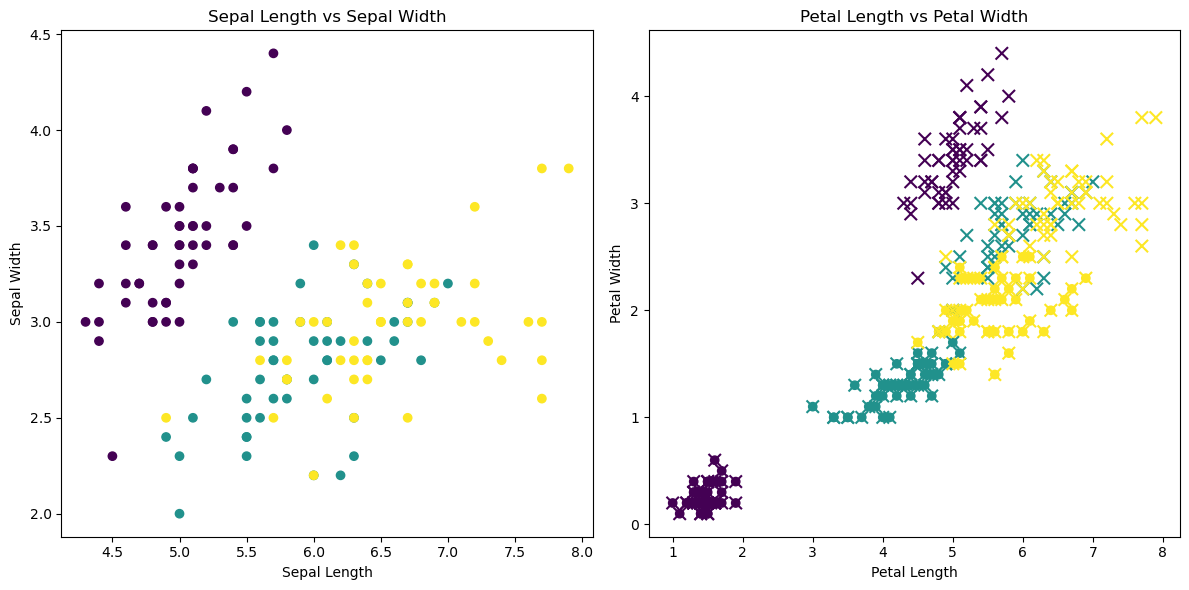

In [4]:
# Create scatter plots
plt.figure(figsize=(12, 6))

# Sepal Length vs Sepal Width
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Petal Length vs Petal Width
plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')

# Show the predicted classes as markers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x', s=80, edgecolors='black', cmap='viridis')
plt.scatter(X[:, 2], X[:, 3], c=y_pred, marker='x', s=80, edgecolors='black', cmap='viridis')

plt.tight_layout()
plt.show()


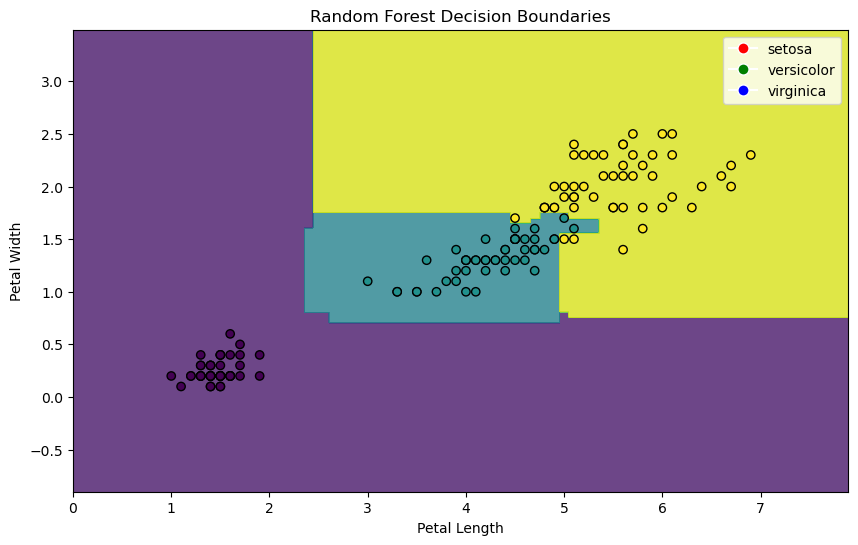

In [6]:
# Create a meshgrid to plot the decision boundaries
x_min, x_max = X_visualization[:, 0].min() - 1, X_visualization[:, 0].max() + 1
y_min, y_max = X_visualization[:, 1].min() - 1, X_visualization[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_visualization[:, 0], X_visualization[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Random Forest Decision Boundaries')

# Plot legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8)]
plt.legend(handles, iris.target_names)

plt.show()


In [15]:

# Evaluate the model's performance
print(classification_report(y_test, y_pred, target_names=iris.target_names))
# Calculate accuracy for Random Forest Classifier
accuracy = accuracy_score(y_test, y_pred)
print("\nRandom Forest Accuracy: {:.2f}%".format(accuracy*100))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Accuracy: 100.00%


In [20]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)



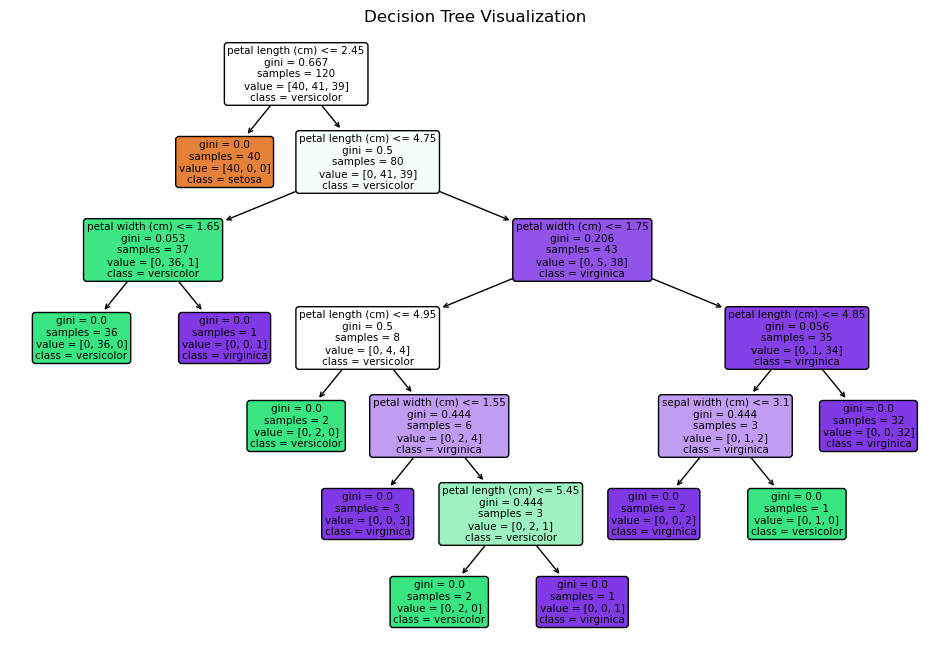

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [22]:

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy:{:.2f}%".format(accuracy*100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy:100.00%
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

